In [1]:
!head qPCR_succession.csv

copies_per_uL,dilution_factor,volume,Density,treatment,day
25.8304668201,30,41,1.77339112,12CCPS,3
43.5007355944,30,50,1.77011284,12CCPS,3
33.8586859216,30,50,1.76464904,12CCPS,3
110.1905028086,30,49,1.76137076,12CCPS,3
73.1457702981,30,48,1.75590696,12CCPS,3
28.8801860133,30,47,1.75153592,12CCPS,3
38.3245981481,30,48,1.74497936,12CCPS,3
159.2286813713,30,43,1.74060832,12CCPS,3
531.0450596177,30,48,1.73733004,12CCPS,3


In [2]:
%load_ext rpy2.ipython

In [4]:
%%R
library(dplyr); library(tidyr)
library(ggplot2)

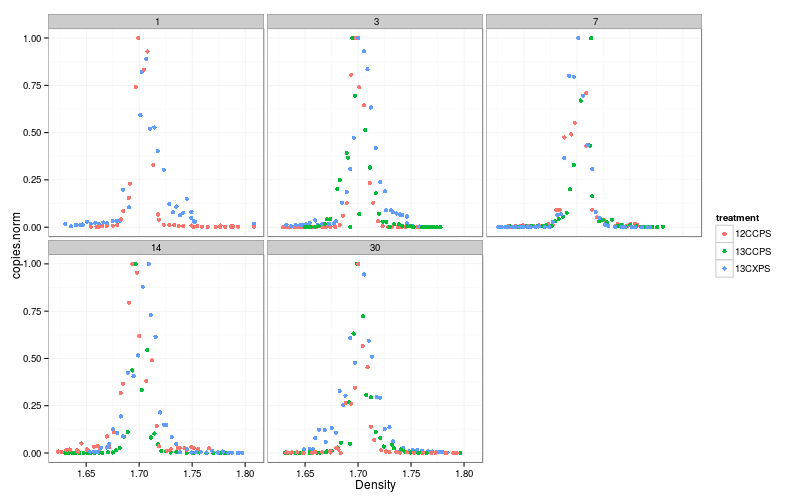

In [86]:
%%R -w 800 -h 500
d = read.csv("qPCR_succession.csv") %>%
    mutate(copies.adj = copies_per_uL * dilution_factor * volume) %>%
    group_by(treatment, day) %>%
    mutate(copies.norm = copies.adj / max(copies.adj)) %>%
    ungroup() %>%
    rowwise() %>%
    mutate(gradient = paste(treatment, day, collapse = " ", sep = "_"))

p = ggplot(d, aes(x = Density, 
                  y = copies.norm, 
                  color = treatment)) #, 
                  #shape = treatment))

p = p + facet_wrap(~day)

p = p + geom_point(size = 2)

p = p + theme_bw()

p

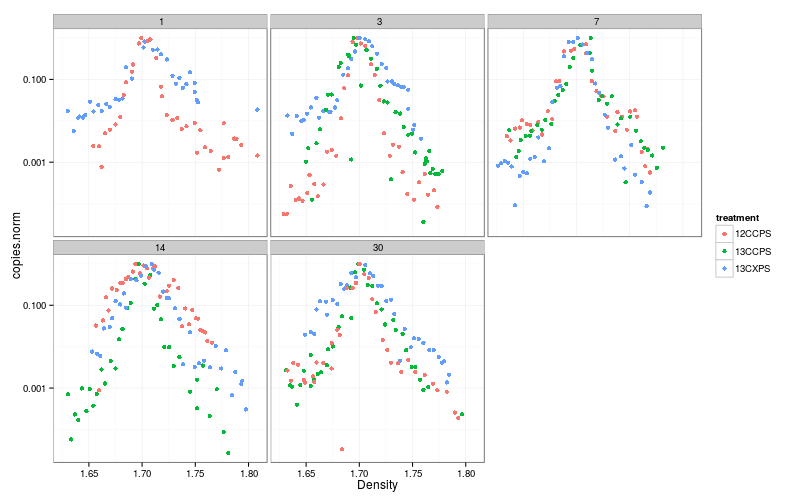

In [82]:
%%R -w 800 -h 500
p = ggplot(d, aes(x = Density, 
                  y = copies.norm, 
                  color = treatment)) #, 
                  #shape = treatment))

p = p + facet_wrap(~day)

p = p + geom_point(size = 2)

p = p + theme_bw()

p = p + scale_y_log10()

p

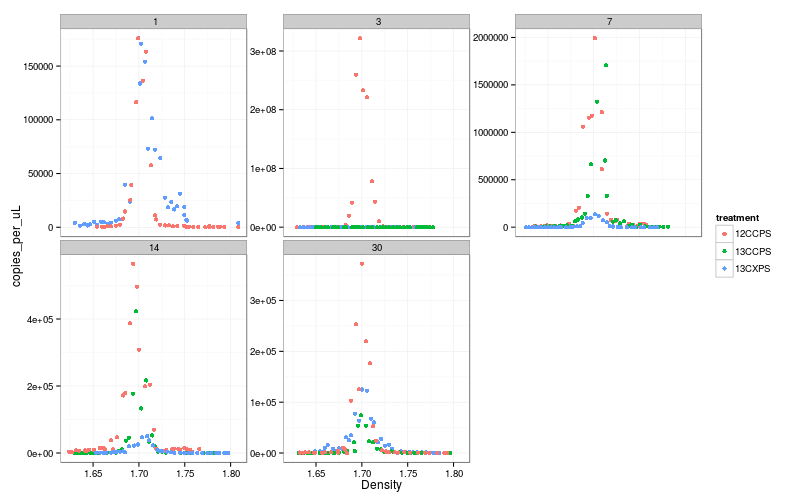

In [89]:
%%R -w 800 -h 500

p = ggplot(d, aes(x = Density, 
                  y = copies_per_uL, 
                  color = treatment)) #, 
                  #shape = treatment))

p = p + facet_wrap(~day, scales = "free_y")

p = p + geom_point(size = 2)

p = p + theme_bw()

p